In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from marbl_diags import analysis_class
import yaml
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
with open('sample_input_files/CORE_vs_JRA.yml') as file_in:
    config_dicts = yaml.load(file_in, Loader=yaml.FullLoader)
with open('variables.yml') as file_in:
    var_dict = yaml.load(file_in, Loader=yaml.FullLoader)
# Create dictionary for data sources
ds_dict = dict()
for ds_file in config_dicts['data_sources']:
    with open(ds_file) as file_in:
        ds_dict_in = yaml.load(file_in, Loader=yaml.FullLoader)
        for ds_name in config_dicts['data_sources'][ds_file]:
            if ds_name not in ds_dict_in:
                raise KeyError("Can not find {} in {}".format(ds_name, ds_file))
            if ds_name in ds_dict:
                raise KeyError("Data source named {} has already been processed".format(ds_name))
            ds_dict[ds_name] = dict(ds_dict_in[ds_name])
        del(ds_dict_in)

# Update configuration dictionary: do not generate png files and
# also save the matplotlib figs as an object on AnalysisElements
config_dicts['global_config']['plot_format']=None
config_dicts['global_config']['keep_figs']=True
AnalysisCategories = dict()
for category_name, analysis_dict in config_dicts['analysis'].items():
    AnalysisCategories[category_name] = \
        analysis_class.AnalysisCategory(category_name, analysis_dict, ds_dict,
                                        var_dict, config_dicts['global_config'])

In [4]:
%%time
for AnalysisCategory in AnalysisCategories.values():
    AnalysisCategory.do_analysis()

/glade/work/mlevy/miniconda3/envs/analysis/lib/python3.7/site-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/work/mlevy/miniconda3/envs/analysis/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


CPU times: user 55.6 s, sys: 15.6 s, total: 1min 11s
Wall time: 55 s


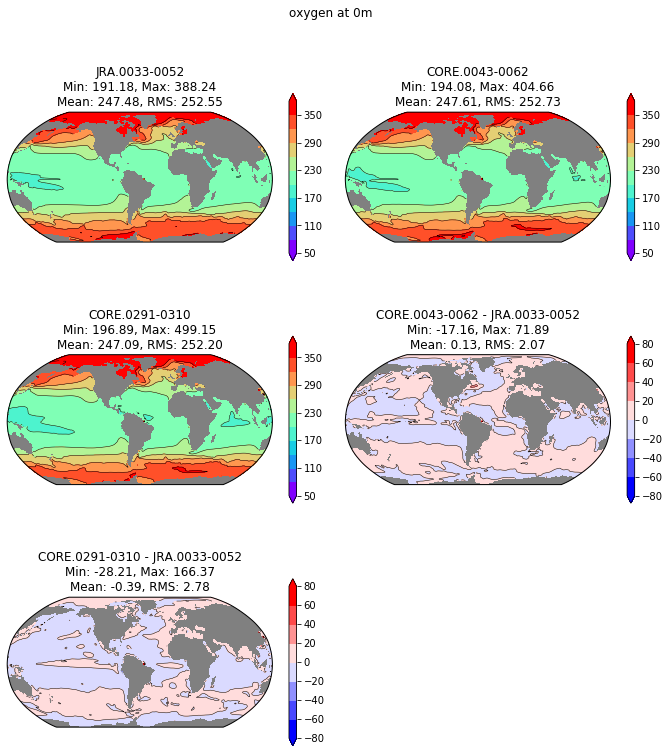

In [5]:
AnalysisCategory.AnalysisElements['JRA_vs_CORE'].fig['state-map-JRA_vs_CORE_oxygen_0m_ANN']